# Importing all packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
from sklearn.cluster import KMeans

In [3]:
from matplotlib import pyplot as plt

# Loading the data

In [6]:
df = pd.read_csv('C:\\Users\\aniketp\\Mall_Customers.csv')

# Analyzing the data

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [40]:
df.isnull().any().any()

False

# From this we can infer that we have total of 5 features: 4 continuous and 1 categorical

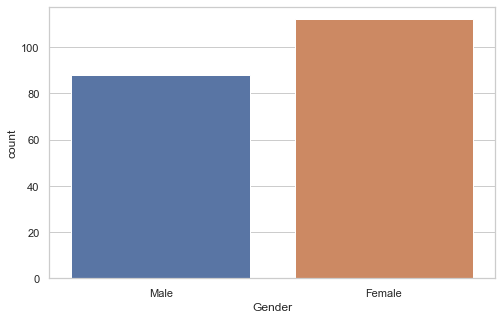

In [96]:
#plt.axes()
plt.figure(figsize =[8,5])
sns.countplot(x='Gender',data=df,)

# Preparing our training data

In [30]:
X = df.iloc[:,[2,3]].values

In [36]:
X_test = df.sample(frac=0.35, replace = True, random_state=1)

#frac=0.5, replace=True, random_state=1

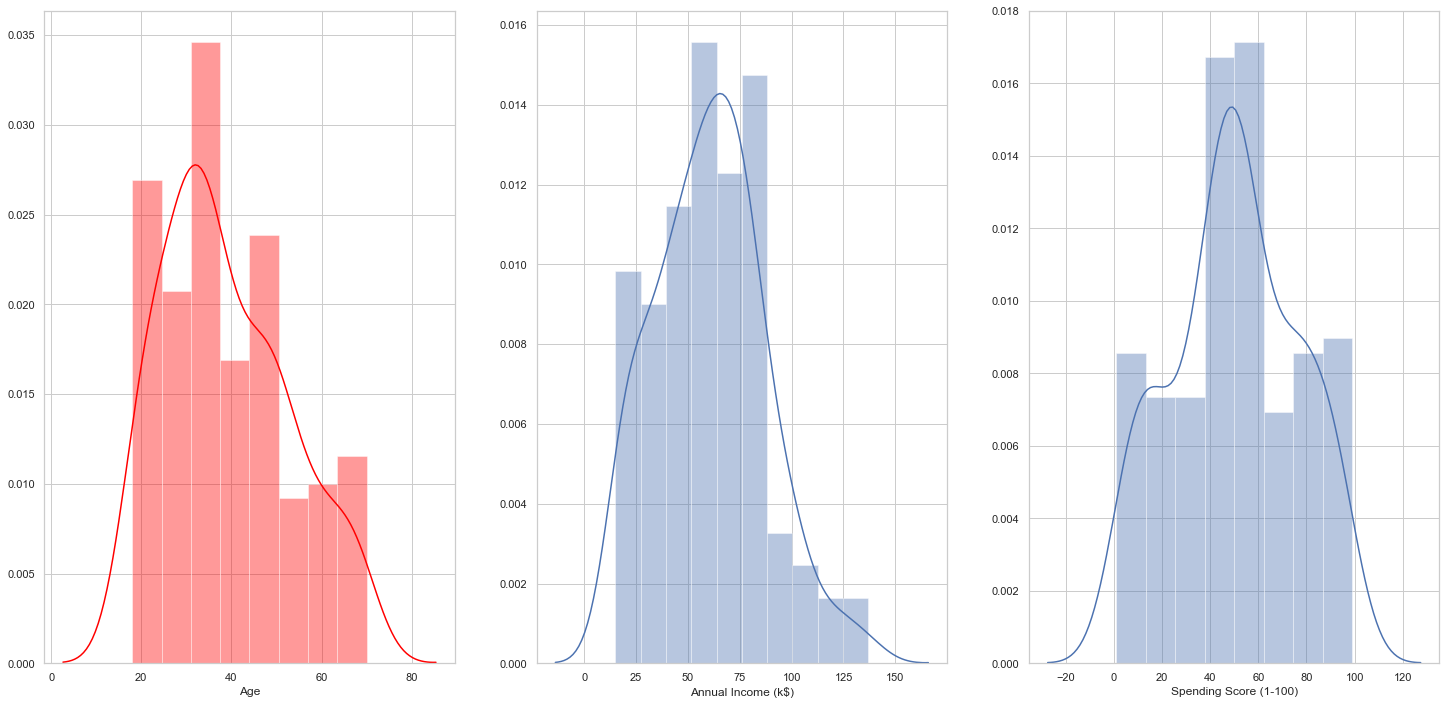

In [152]:
plt.rcParams['figure.figsize'] = (25, 12)

plt.subplot(1, 3, 1)
sns.set(style = 'whitegrid',font_scale=1)
sns.distplot(df['Age'],color = 'red')

plt.subplot(1, 3, 2)
sns.set(style = 'whitegrid',font_scale=1)
sns.distplot(df['Annual Income (k$)'])

plt.subplot(1, 3, 3)
sns.set(style = 'whitegrid',font_scale=1)
sns.distplot(df['Spending Score (1-100)'])

# Running our Clustering Algorithm

In [82]:
wcss = []
for i in range(1,11):
    m = KMeans(n_clusters = i,init='k-means++',random_state=1)
    m.fit(X)
    wcss.append(m.inertia_)

Text(0, 0.5, 'WCSS Score')

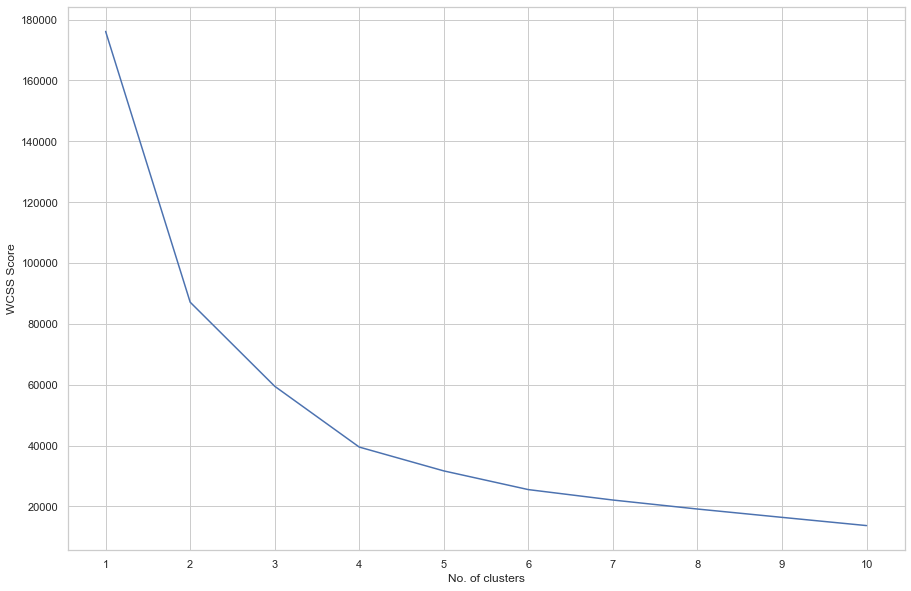

In [84]:
plt.figure(figsize=[15,10])
plt.plot(np.arange(1,11),wcss)
plt.xticks(np.arange(1,11))
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Score')

# Here the elbow has occured at k=5,hence we create the required model

In [135]:
model = KMeans(n_clusters = 5, init = "k-means++", n_init = 10, random_state = 2)

In [136]:
model.fit(X)
y_clusters = model.predict(X)

In [137]:
X[y_clusters==0,1]

array([67, 67, 69, 69, 70, 71, 71, 71, 71, 71, 72, 73, 73, 73, 74, 75, 75,
       76, 76, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78,
       78, 79, 79, 81, 81, 85, 85, 86, 86, 87, 87, 87, 87, 87, 87, 88, 88,
       88, 88, 93, 93], dtype=int64)

# Visualizing the cluster on our training data

Text(0, 0.5, 'Annual Income')

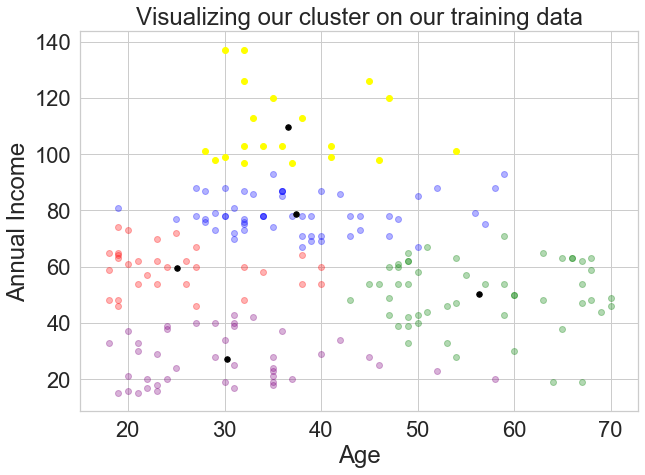

In [149]:
plt.figure(figsize = [10,7])
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],c = 'blue',alpha=0.3)
plt.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],c = 'purple',alpha=0.3)
plt.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],c = 'green',alpha=0.3)
plt.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],c='red', alpha=0.3)
plt.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],c='yellow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c ='black',s=30)
plt.title('Visualizing our cluster on our training data')
plt.xlabel('Age')
plt.ylabel('Annual Income')

In [139]:
X_t = X_test.iloc[:,[2,3]].values

In [140]:
y_tc=model.predict(X_test.iloc[:,[2,3]].values)

Text(0, 0.5, 'Annual Income')

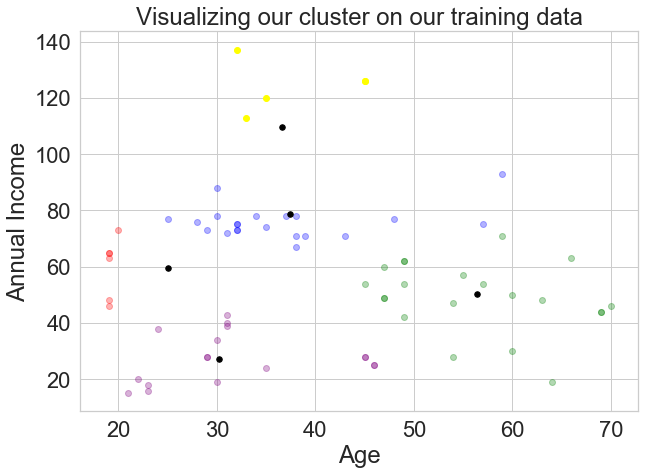

In [148]:
plt.figure(figsize = [10,7])
plt.scatter(X_t[y_tc==0,0],X_t[y_tc==0,1],c = 'blue',alpha=0.3)
plt.scatter(X_t[y_tc == 1,0],X_t[y_tc == 1,1],c = 'purple',alpha=0.3)
plt.scatter(X_t[y_tc == 2,0],X_t[y_tc == 2,1],c = 'green',alpha=0.3)
plt.scatter(X_t[y_tc == 3,0],X_t[y_tc == 3,1],c='red', alpha=0.3)
plt.scatter(X_t[y_tc == 4,0],X_t[y_tc == 4,1],c='yellow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c ='black',s=30)
plt.title('Visualizing our cluster on our training data')
plt.xlabel('Age')
plt.ylabel('Annual Income')